
# SVM (Support Vector Machine)

SVM은 데이터 포인트를 분류하기 위해 결정 경계(Decision Boundary)를 찾는 지도 학습 기법입니다.

### 주요 개념
- **마진(Margin)**: 두 클래스의 가장 가까운 데이터 포인트 간의 거리.
- **서포트 벡터(Support Vector)**: 마진에 위치한 데이터 포인트.

---


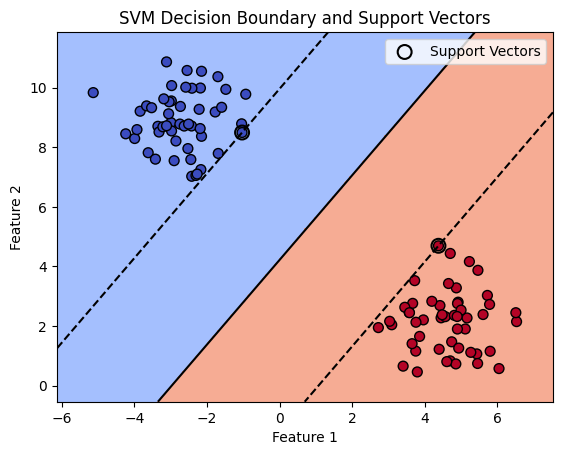

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# SVM 모델 학습
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# 결정 경계 및 서포트 벡터 시각화 함수
def plot_svm_decision_boundary(svm, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 시각화
    plt.contourf(xx, yy, Z > 0, alpha=0.8, cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # 데이터 포인트와 서포트 벡터
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    plt.title("SVM Decision Boundary and Support Vectors")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 시각화 함수 호출
plot_svm_decision_boundary(svm, X, y)



# Lagrange Multiplier with KKT Condition

SVM의 최적화를 위한 라그랑주 승수법(Lagrange Multiplier)을 사용하며, KKT 조건을 만족시켜야 합니다.

### KKT 조건
- **최적화 문제**를 해결하기 위한 제약 조건.

---


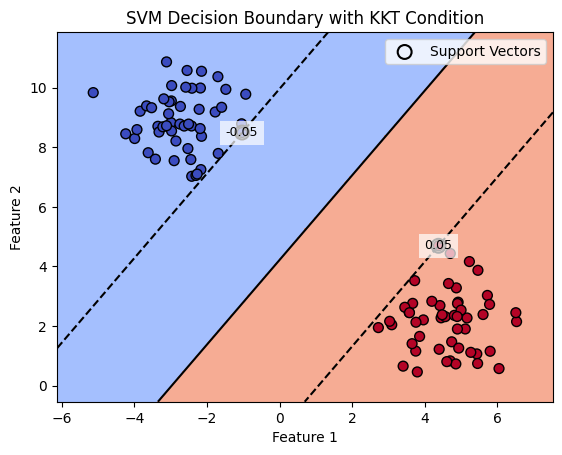

In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# SVM 모델 학습
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# 결정 경계 및 서포트 벡터 시각화 함수
def plot_kkt_svm(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 및 마진 시각화
    plt.contourf(xx, yy, Z > 0, alpha=0.8, cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # 데이터 포인트와 서포트 벡터 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    # KKT 조건에 따른 서포트 벡터 강조
    dual_coefs = model.dual_coef_[0]
    for sv, alpha in zip(model.support_vectors_, dual_coefs):
        plt.text(sv[0], sv[1], f"{alpha:.2f}", color="black", fontsize=9,
                 ha="center", va="center", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.title("SVM Decision Boundary with KKT Condition")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 시각화 함수 호출
plot_kkt_svm(model, X, y)



# Dual Problem

SVM 최적화 문제를 이중 형태(Dual Problem)로 변환하여 계산을 단순화.

### 주요 특징
- 계산 복잡도 감소.
- Kernel Trick과 결합 가능.

---


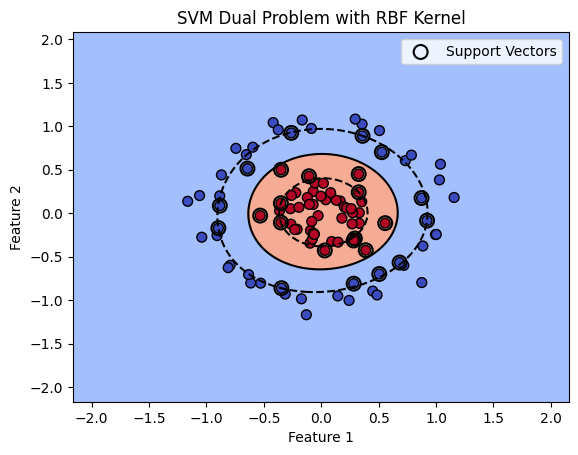

In [3]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 비선형 데이터 생성
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# 이중 문제를 풀기 위해 Kernel Trick이 적용된 SVM 학습 (RBF 커널 사용)
svm = SVC(kernel='rbf', C=1.0, gamma=1.0)
svm.fit(X, y)

# 결정 경계 시각화 함수
def plot_dual_problem_decision_boundary(svm, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 시각화
    plt.contourf(xx, yy, Z > 0, alpha=0.8, cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # 데이터 포인트와 서포트 벡터 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    plt.title("SVM Dual Problem with RBF Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 시각화 함수 호출
plot_dual_problem_decision_boundary(svm, X, y)



# C-SVM (Soft-Margin SVM)

C-SVM은 하드 마진(Hard-Margin) SVM에서 유연성을 추가하여 마진 내에 관측치를 허용합니다.

### 특징
- **C 값**: 마진과 허용 오차 간의 균형을 조정.
- C가 크면 마진이 좁아지고, 작으면 마진이 넓어짐.

---


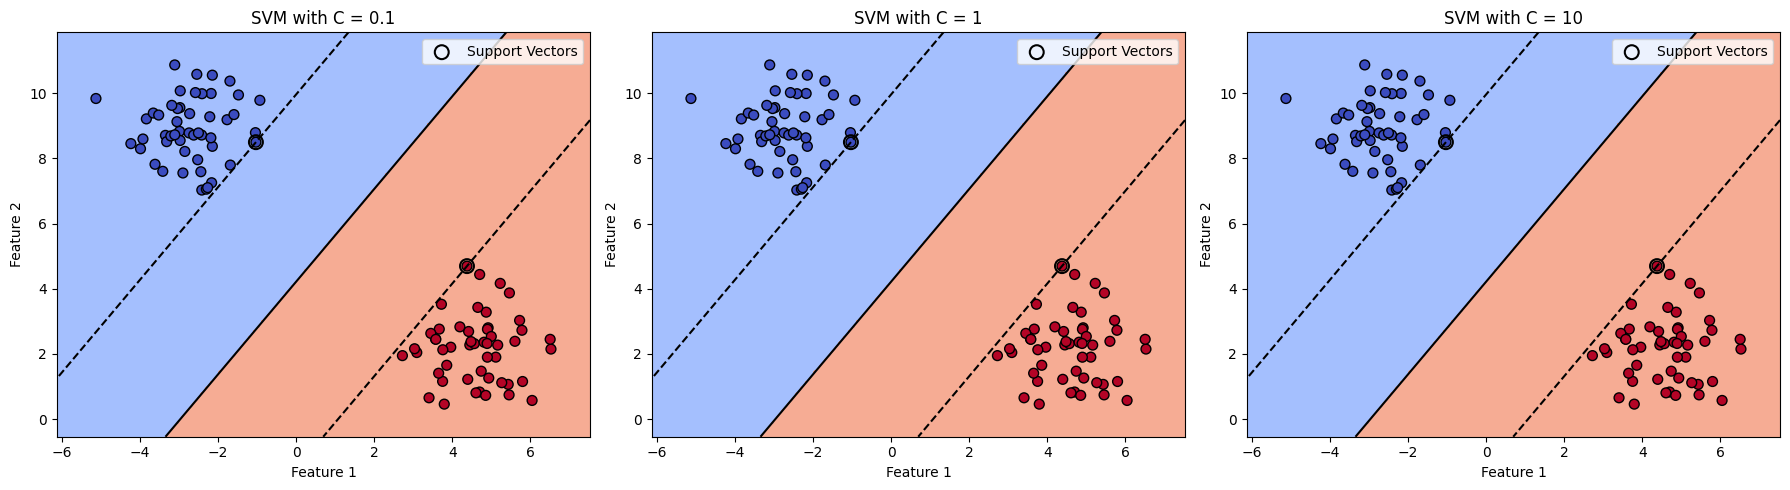

In [4]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# C 값에 따른 SVM 학습 및 시각화
C_values = [0.1, 1, 10]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    # 결정 경계 및 마진 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 및 마진 시각화
    axes[i].contourf(xx, yy, Z > 0, alpha=0.8, cmap='coolwarm')
    axes[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    axes[i].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    axes[i].set_title(f"SVM with C = {C}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
    axes[i].legend()

plt.tight_layout()
plt.show()




# Kernel-SVM

선형 분리가 불가능한 데이터를 고차원 공간으로 맵핑하여 분류.

### 주요 Kernel
- **Linear Kernel**: 선형.
- **Polynomial Kernel**: 다항식.
- **Sigmoid Kernel**: 시그모이드.
- **Gaussian (RBF) Kernel**: 방사형.

---


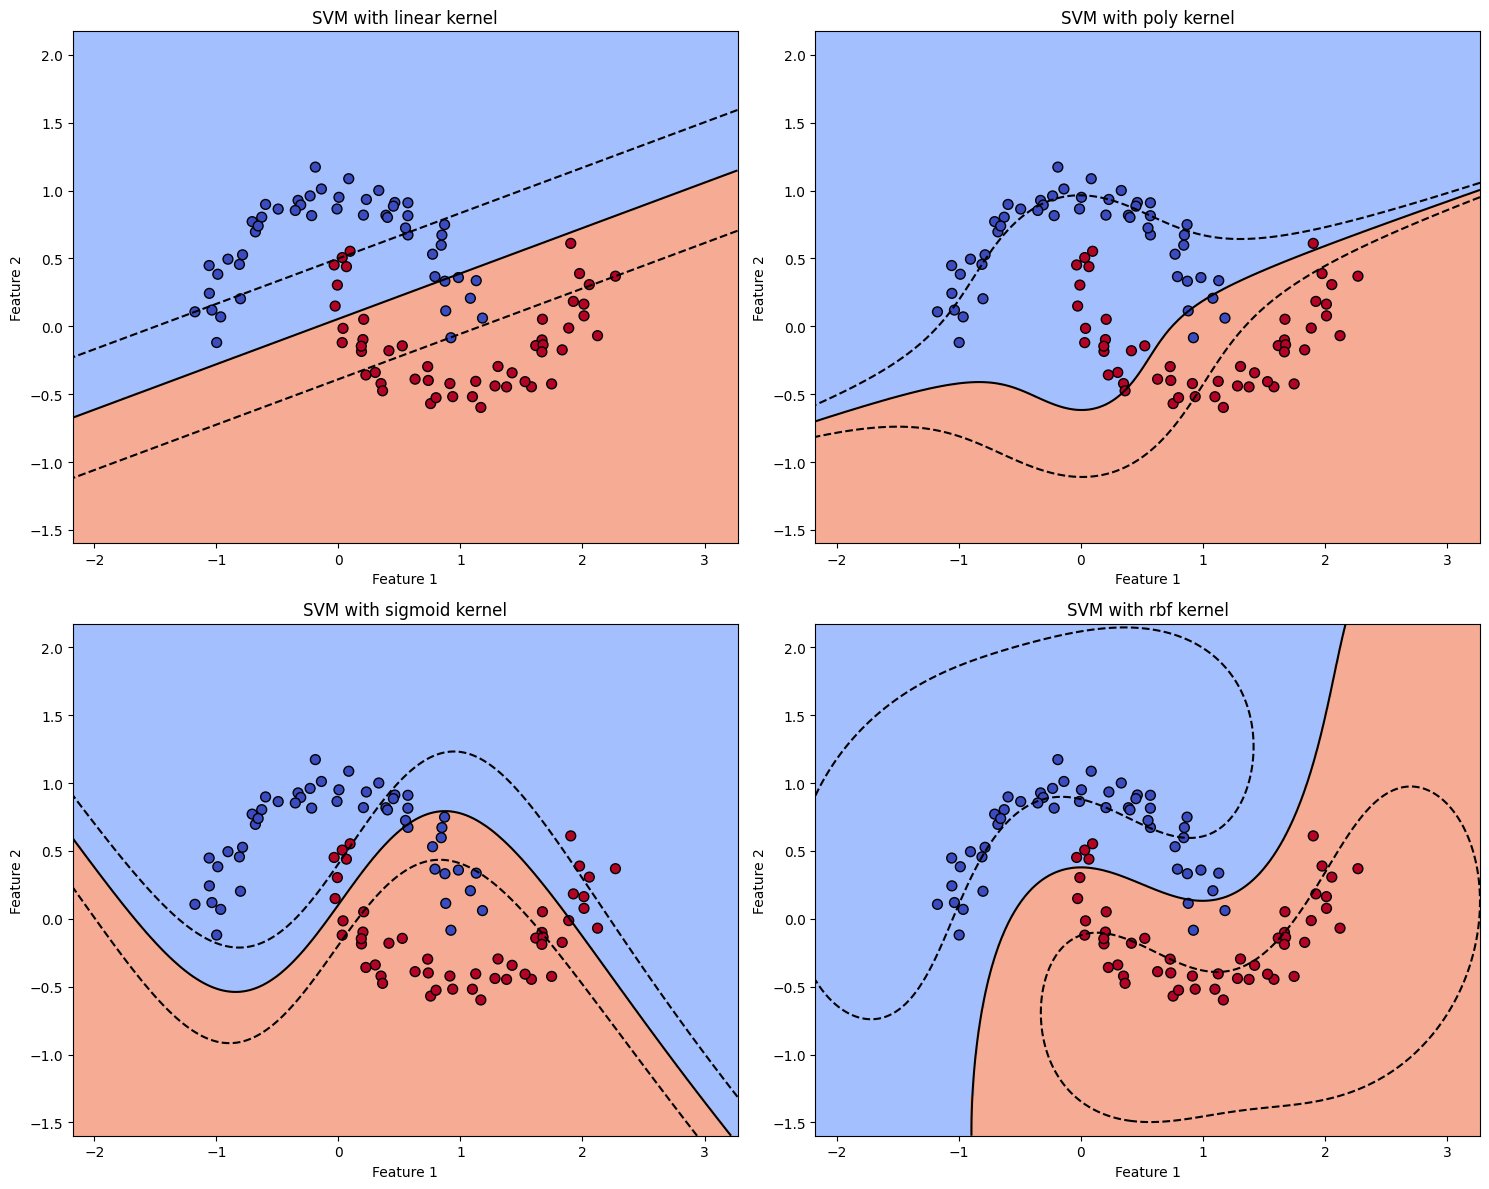

In [5]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 비선형 데이터 생성
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# 주요 Kernel 설정
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, kernel in enumerate(kernels):
    # SVM 모델 학습
    model = SVC(kernel=kernel, C=1.0, gamma=0.5, degree=3)
    model.fit(X, y)

    # 결정 경계 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[i // 2, i % 2]
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap='coolwarm')
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    ax.set_title(f"SVM with {kernel} kernel")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()
